# Classificação de Churn com Regressão Logística
```
# O que é Churn?
Churn é uma métrica que indica o quanto sua empresa perdeu de receita ou clientes.
```

O dataset utilizado é proveniente de uma empresa fictícia de telefonia, criado e disponibilizado pela IBM para fins didáticos.

O dicionário com as descrições das features pode ser encontrado [neste link no Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).

# 🧩 Libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder


In [2]:
from sklearn import set_config
set_config(display='diagram')

# 🗂️ Data


In [3]:
df = pd.read_excel('https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx', index_col=0)
display(df)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN


# 🛠️ Exploratory Data Analysis (EDA)

In [4]:
# Conferindo se não tem linhas duplicadas
df.duplicated().sum().any()

np.False_

In [5]:
# Conferindo se não tem valores faltantes
df.isna().sum()

Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [4]:
df.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [5]:
print(f"Phone Service: {df["Phone Service"].unique()}")
print(f"Internet Service: {df["Internet Service"].unique()}")
print(f"Online Security: {df["Online Security"].unique()}")

Phone Service: ['Yes' 'No']
Internet Service: ['DSL' 'Fiber optic' 'No']
Online Security: ['Yes' 'No' 'No internet service']


## Inicial Drops

In [6]:
df[df['Churn Reason'].isna()]['Churn Label'].value_counts()

Churn Label
No    5174
Name: count, dtype: int64

In [7]:
# Essas variavéis dizem basicamente a mesma informação
df.filter(like='Churn')

,Churn Label,Churn Value,Churn Score,Churn Reason
CustomerID,,,,
3668-QPYBK,Yes,1,86,Competitor made better offer
9237-HQITU,Yes,1,67,Moved
9305-CDSKC,Yes,1,86,Moved
7892-POOKP,Yes,1,84,Moved
0280-XJGEX,Yes,1,89,Competitor had better devices
...,...,...,...,...
2569-WGERO,No,0,45,NaN
6840-RESVB,No,0,59,NaN
2234-XADUH,No,0,71,NaN


In [8]:
# Drop churn columns -  vamos ignorar algumas colunas
df.drop(columns=['Churn Label', 'Churn Reason'], inplace=True)

In [9]:
# Eliminando as colunas que tem apenas uma informação
constant_cols = df.columns[df.nunique()==1] # [Count, Country, State]
df.drop(columns=constant_cols, inplace=True)

In [10]:
# Eliminando algumas colunas que não serão úteis para o modelo
geographic_cols2drop = ['City', 'Zip Code', 'Lat Long']
df.drop(columns=geographic_cols2drop, inplace=True)

In [11]:
df.head(2)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701


## Correcting types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7043 non-null   float64
 1   Longitude          7043 non-null   float64
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract      

In [13]:
# Convertendo Total Charges para float

'''
# Outra forma de fazer a conversão
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
'''

str_idx = df['Total Charges'].map(lambda x: isinstance(x, str))
int_idx = df['Total Charges'].map(lambda x: isinstance(x, int))

df.loc[int_idx, 'Total Charges'] = df.loc[int_idx, 'Total Charges'].astype(float)
df.loc[str_idx, 'Total Charges'] = 0

In [14]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [15]:
df.head(2)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701


In [16]:
# Verificando a conversão dos valores que estamos em str -> 0
df[df['Total Charges']==0]

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,36,2578
3115-CZMZD,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,...,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,0,68,5504
5709-LVOEQ,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,...,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0,45,2048
4367-NUYAO,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,0,48,4950
1371-DWPAZ,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0,30,4740
7644-OMVMY,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,0,53,2019
3213-VVOLG,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,0,49,2299
2520-SGTTA,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,0,27,3763
2923-ARZLG,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,0,69,4890


In [17]:
df[df['Total Charges']!=0]

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306
6840-RESVB,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,59,2140
2234-XADUH,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560


## One-hot encoding of categorical columns & Standardization
Padronização das colunas numéricas e Codificação one-hot das colunas categóricas

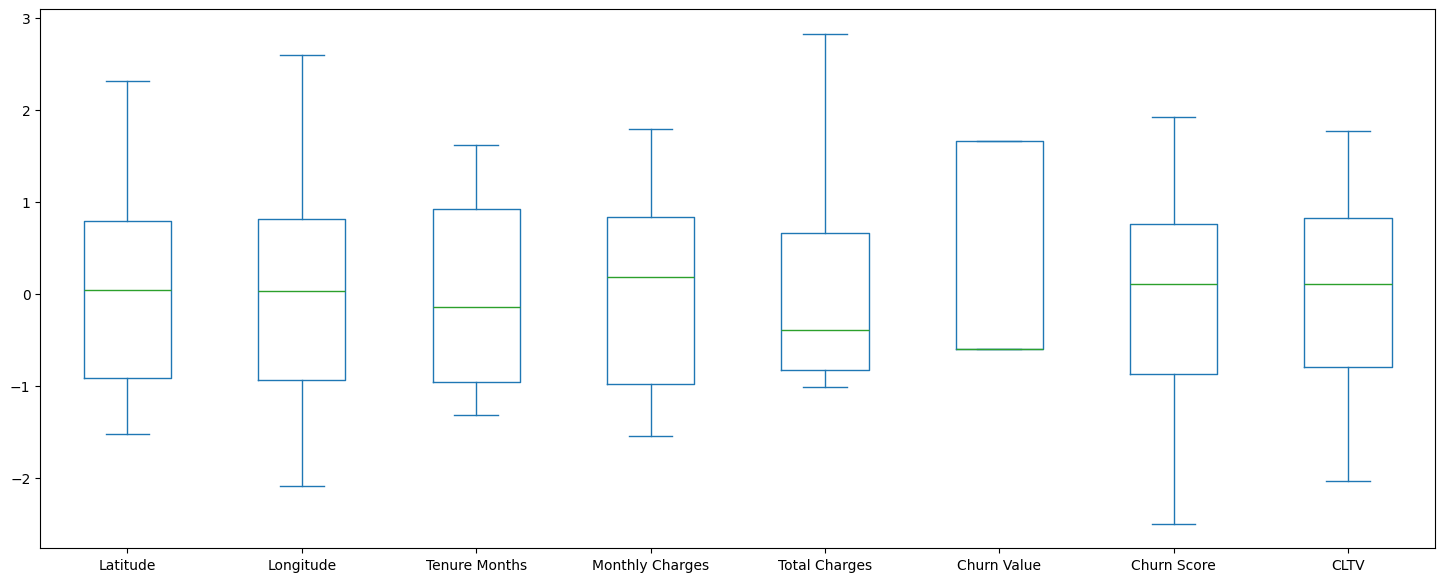

In [18]:
# Selecionados as variáveis numéricas para verificar sua distribuição
numeric_cols = df.select_dtypes('number').columns
df[numeric_cols].apply(scale).plot.box(figsize=(18,7));

In [19]:
# Separando o target das features
df_features = df.drop(columns='Churn Value')
target = df['Churn Value']

In [20]:
# Separando as colunas por tipo
numerical_cols = df_features.select_dtypes('number').columns
categorical_cols = df_features.select_dtypes(exclude='number').columns

In [21]:
# Padronização das colunas numéricas e codificação one-hot das colunas categóricas
preprocessing = ColumnTransformer([
    ('numerical_preprocessing', StandardScaler(), numerical_cols),
    ('categorical_preprocessing', OneHotEncoder(), categorical_cols)
])

preprocessing.fit(df_features)

ColumnTransformer(transformers=[('numerical_preprocessing', StandardScaler(),
                                 Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'Churn Score', 'CLTV'],
      dtype='object')),
                                ('categorical_preprocessing', OneHotEncoder(),
                                 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])

In [22]:
preprocessing.get_feature_names_out()

array(['numerical_preprocessing__Latitude',
       'numerical_preprocessing__Longitude',
       'numerical_preprocessing__Tenure Months',
       'numerical_preprocessing__Monthly Charges',
       'numerical_preprocessing__Total Charges',
       'numerical_preprocessing__Churn Score',
       'numerical_preprocessing__CLTV',
       'categorical_preprocessing__Gender_Female',
       'categorical_preprocessing__Gender_Male',
       'categorical_preprocessing__Senior Citizen_No',
       'categorical_preprocessing__Senior Citizen_Yes',
       'categorical_preprocessing__Partner_No',
       'categorical_preprocessing__Partner_Yes',
       'categorical_preprocessing__Dependents_No',
       'categorical_preprocessing__Dependents_Yes',
       'categorical_preprocessing__Phone Service_No',
       'categorical_preprocessing__Phone Service_Yes',
       'categorical_preprocessing__Multiple Lines_No',
       'categorical_preprocessing__Multiple Lines_No phone service',
       'categorical_preprocessi

In [23]:
pd.DataFrame(
    data=preprocessing.transform(df_features),
    columns=preprocessing.get_feature_names_out()
)

,numerical_preprocessing__Latitude,numerical_preprocessing__Longitude,numerical_preprocessing__Tenure Months,numerical_preprocessing__Monthly Charges,numerical_preprocessing__Total Charges,numerical_preprocessing__Churn Score,numerical_preprocessing__CLTV,categorical_preprocessing__Gender_Female,categorical_preprocessing__Gender_Male,categorical_preprocessing__Senior Citizen_No,...,categorical_preprocessing__Streaming Movies_Yes,categorical_preprocessing__Contract_Month-to-month,categorical_preprocessing__Contract_One year,categorical_preprocessing__Contract_Two year,categorical_preprocessing__Paperless Billing_No,categorical_preprocessing__Paperless Billing_Yes,categorical_preprocessing__Payment Method_Bank transfer (automatic),categorical_preprocessing__Payment Method_Credit card (automatic),categorical_preprocessing__Payment Method_Electronic check,categorical_preprocessing__Payment Method_Mailed check
0,-0.944111,0.707268,-1.236724,-0.362660,-0.958066,1.268402,-0.981675,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.905362,0.691215,-1.236724,0.197365,-0.938874,0.385650,-1.436462,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.909951,0.697457,-0.992402,1.159546,-0.643789,1.268402,0.821409,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.904204,0.687374,-0.177995,1.330711,0.338085,1.175481,0.509483,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.913530,0.710276,0.677133,1.294151,1.216150,1.407784,0.794358,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.790334,1.510595,1.613701,-1.449476,-0.379565,-0.636484,0.765617,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7039,-0.657542,1.048644,-0.340876,0.665992,-0.127605,0.013965,-1.910691,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7040,-0.701497,1.928742,1.613701,1.277533,2.242606,0.571493,0.980330,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,-0.861169,1.360014,-0.870241,-1.168632,-0.852932,0.013965,-1.358692,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
df_mi = df.copy()

encoder = OrdinalEncoder()
df_mi[categorical_cols] = encoder.fit_transform(df_mi[categorical_cols]).astype(int)
df_mi.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,1,0,0,0,2,1,0,0,...,0,0,0,1,3,53.85,108.15,1,86,3239
9237-HQITU,34.059281,-118.307420,0,0,0,1,2,1,0,1,...,0,0,0,1,2,70.70,151.65,1,67,2701
9305-CDSKC,34.048013,-118.293953,0,0,0,1,8,1,2,1,...,2,2,0,1,2,99.65,820.50,1,86,5372
7892-POOKP,34.062125,-118.315709,0,0,1,1,28,1,2,1,...,2,2,0,1,2,104.80,3046.05,1,84,5003
0280-XJGEX,34.039224,-118.266293,1,0,0,1,49,1,2,1,...,2,2,0,1,0,103.70,5036.30,1,89,5340


In [25]:
# Salvando o arquivo
df_mi.to_csv('churn.csv', encoding='utf-8', index=False)

# 📝 Data Insights

In [26]:
# Configuração do estilo
sns.set_style("whitegrid")

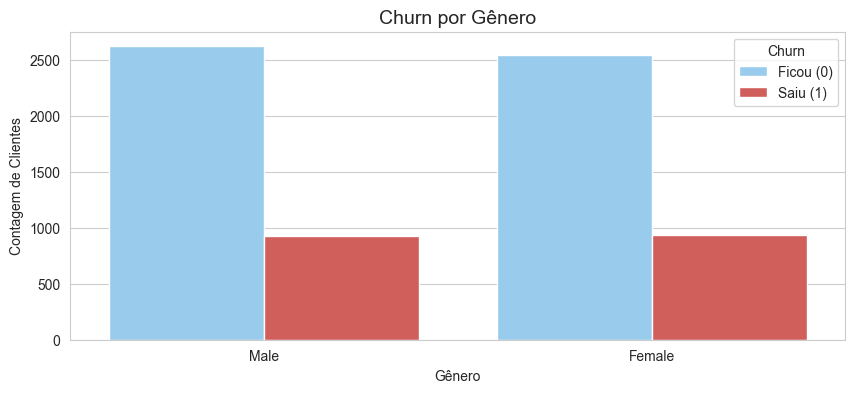

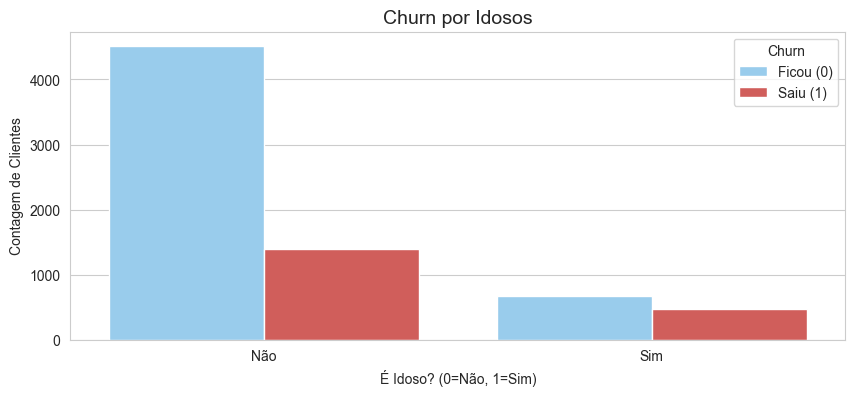

In [27]:
''' Perfil Demográfico e Churn: Gênero e Senior Citizen têm impacto no churn?'''

# --- Gênero
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Gender", hue="Churn Value", palette={0: "#8BCFFA", 1: "#E34B48"})
plt.title("Churn por Gênero", fontsize=14)
plt.xlabel("Gênero")
plt.ylabel("Contagem de Clientes")
plt.legend(title="Churn", labels=["Ficou (0)", "Saiu (1)"])
plt.show()

# --- Senior Citizen
plt.figure(figsize=(10, 4))
sns.countplot(data=df_mi, x="Senior Citizen", hue="Churn Value", palette={0: "#8BCFFA", 1: "#E34B48"})
plt.title("Churn por Idosos", fontsize=14)
plt.xlabel("É Idoso? (0=Não, 1=Sim)")
plt.ylabel("Contagem de Clientes")
plt.xticks([0, 1], ["Não", "Sim"])
plt.legend(title="Churn", labels=["Ficou (0)", "Saiu (1)"])
plt.show()

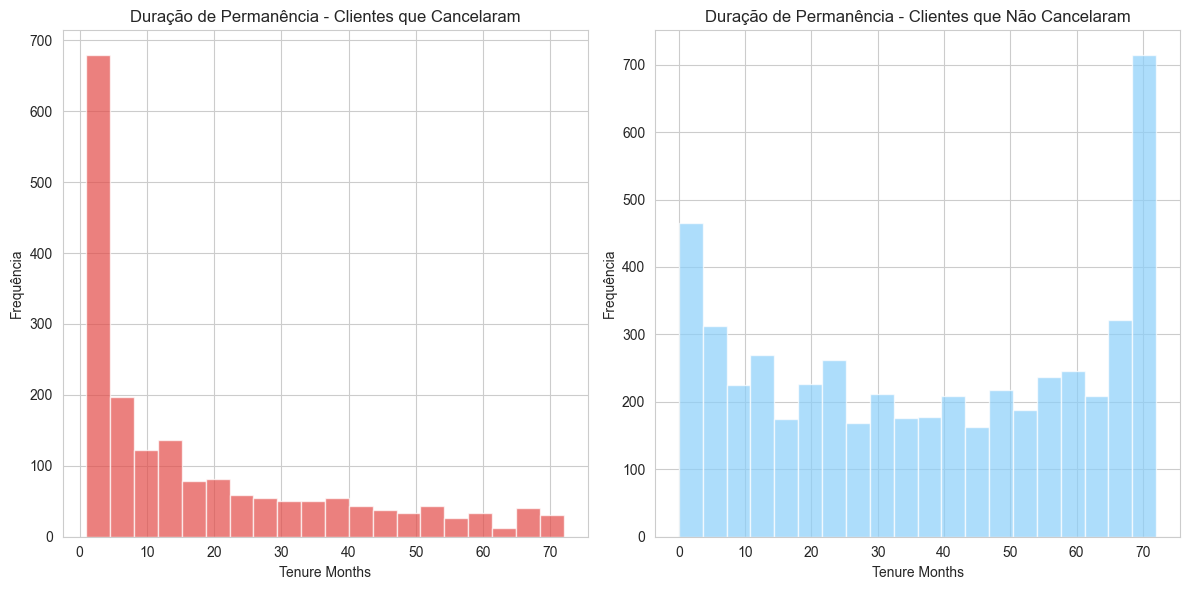

In [28]:
''' Clientes com menos tempo de permanência têm maior chance de churn?
Qual é a relação entre a duração de permanência (Tenure Months) e o valor de churn (Churn Value)? '''

plt.figure(figsize=(12, 6))

# Histograma para clientes que cancelaram (churn = 1)
plt.subplot(1, 2, 1)
df_mi[df_mi['Churn Value'] == 1]['Tenure Months'].hist(bins=20, color='#E34B48', alpha=0.7)
plt.title('Duração de Permanência - Clientes que Cancelaram')
plt.xlabel('Tenure Months')
plt.ylabel('Frequência')

# Histograma para clientes que não cancelaram (churn = 0)
plt.subplot(1, 2, 2)
df_mi[df_mi['Churn Value'] == 0]['Tenure Months'].hist(bins=20, color='#8BCFFA', alpha=0.7)
plt.title('Duração de Permanência - Clientes que Não Cancelaram')
plt.xlabel('Tenure Months')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

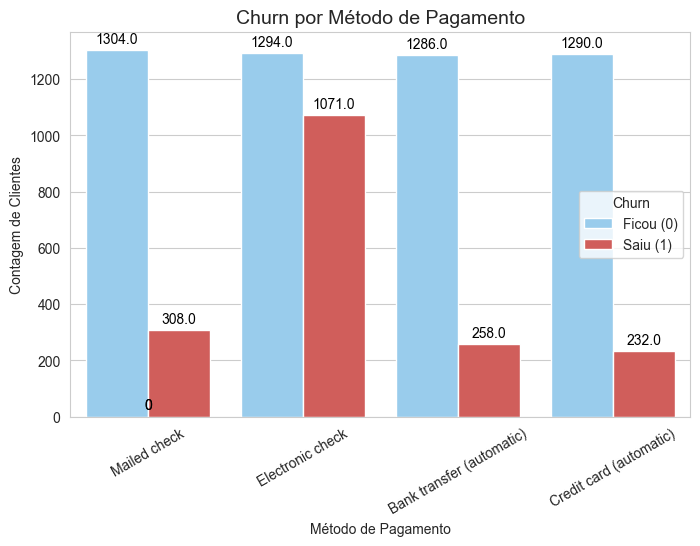

In [29]:
'''Como o método de pagamento influencia a taxa de churn?'''

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Payment Method", hue="Churn Value", palette={0: "#8BCFFA", 1: "#E34B48"})
plt.title("Churn por Método de Pagamento", fontsize=14)
plt.xlabel("Método de Pagamento")
plt.ylabel("Contagem de Clientes")
plt.legend(title="Churn", labels=["Ficou (0)", "Saiu (1)"])
plt.xticks(rotation=30)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

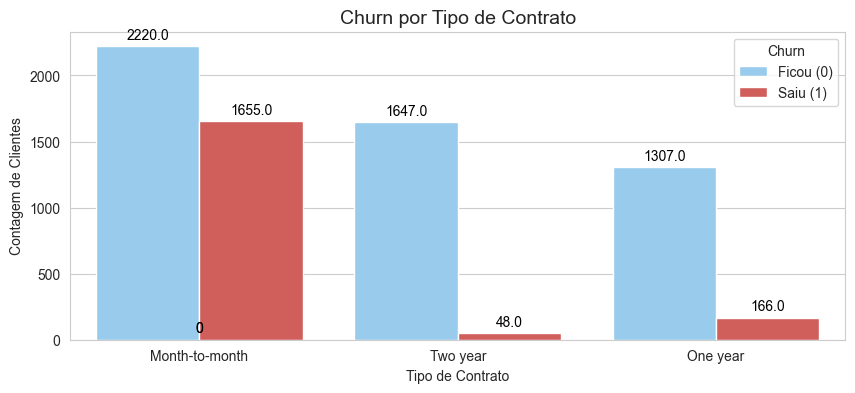

In [30]:
'''
# O Tipo de Contrato influenciam o churn?

'''

plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x="Contract", hue="Churn Value", palette={0: "#8BCFFA", 1: "#E34B48"})
plt.title("Churn por Tipo de Contrato", fontsize=14)
plt.xlabel("Tipo de Contrato")
plt.ylabel("Contagem de Clientes")
plt.legend(title="Churn", labels=["Ficou (0)", "Saiu (1)"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

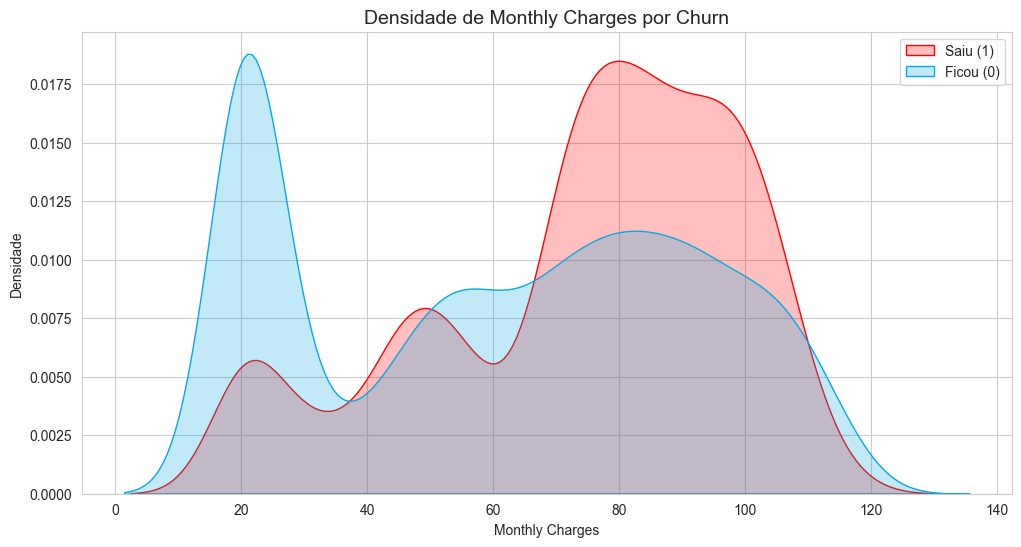

In [31]:
'''Clientes com cobranças mais altas têm maior churn?'''

plt.figure(figsize=(12, 6))
sns.kdeplot(df[df["Churn Value"] == 1]["Monthly Charges"], fill=True, color="red", label="Saiu (1)")
sns.kdeplot(df[df["Churn Value"] == 0]["Monthly Charges"], fill=True, color="#08A8E0", label="Ficou (0)")
plt.title("Densidade de Monthly Charges por Churn", fontsize=14)
plt.xlabel("Monthly Charges")
plt.ylabel("Densidade")
plt.legend()
plt.show()